In [5]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [9]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [11]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [13]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [15]:
hist = model.fit_generator(
    train_generator,
    #steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
7/7 [==============================] - 44s 6s/step - loss: 0.6256 - accuracy: 0.6473 - val_loss: 0.5796 - val_accuracy: 0.7667
Epoch 2/10
7/7 [==============================] - 43s 6s/step - loss: 0.5128 - accuracy: 0.7768 - val_loss: 0.5123 - val_accuracy: 0.9333
Epoch 3/10
7/7 [==============================] - 47s 7s/step - loss: 0.3987 - accuracy: 0.8214 - val_loss: 0.2862 - val_accuracy: 0.9500
Epoch 4/10
7/7 [==============================] - 52s 7s/step - loss: 0.3225 - accuracy: 0.8527 - val_loss: 0.3298 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 54s 8s/step - loss: 0.2428 - accuracy: 0.8973 - val_loss: 0.2117 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 56s 8s/step - loss: 0.2622 - accuracy: 0.9062 - val_loss: 0.2240 - val_accuracy: 0.9167
Epoch 7/10
7/7 [==============================] - 48s 7s/step - loss: 0.1977 - accuracy: 0.9062 - val_loss: 0.0873 - val_accuracy: 0.9833
Epoch 8/10
7/7 [==================

In [19]:
model.evaluate_generator(train_generator)

/Users/prankurtewari/Desktop/Covid/env/lib/python3.9/site-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.1334870308637619, 0.96875]

In [20]:
model.evaluate_generator(validation_generator)

[0.12183841317892075, 0.9666666388511658]

In [22]:
y_actual=[]
y_test=[]
import os

In [25]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

/Users/prankurtewari/Desktop/Covid/env/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [26]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [27]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [34]:
import sys
!{sys.executable} -m pip3 install sklearn

/Users/prankurtewari/Desktop/Covid/env/bin/python: No module named pip3


In [35]:
from sklearn.metrics import confusion_matrix

In [37]:
import seaborn as sns

In [38]:
cm=confusion_matrix(y_actual,y_test)

<AxesSubplot:>

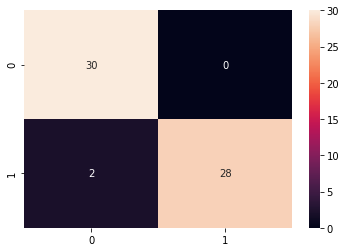

In [40]:
sns.heatmap(cm,annot=True)